In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import scipy
import matplotlib as mpl
import matplotlib.pyplot as plt

import scipy.optimize as optm

import os
import sys
import time
from pathlib import Path
fun_lib_path = Path.home() / 'git/alexei_fun_lib' 
sys.path.append(str(fun_lib_path))

import collections
import functools

import optics_funs as of
import numerical_funs as nf
import matplotlib_funs as mpf
import LCT_funs as lctf
import general_funs as gef

import new_types as nt
import mutants

import finesse
import finesse.ligo
from finesse.cymath.homs import HGModes

import func_funs as ff
import graph_funs as grf
import finesse3_funs as f3f
import wolfram_funs as wlf

import networkx as nx
# import pygraphviz as pgv
import pydot

from IPython.display import Image, SVG

In [28]:
scipy.sparse.linalg.LinearOperator

scipy.sparse.linalg.interface.LinearOperator

In [31]:
'KLU - A HIGH PERFORMANCE SPARSE LINEAR SOLVER FOR CIRCUIT SIMULATION PROBLEMS'.title()

'Klu - A High Performance Sparse Linear Solver For Circuit Simulation Problems'

In [4]:
code = '''
m PRM
s lp1 PRM.p2 PR2.p1
bs PR2
s lp2 PR2.p2 PR3.p1
bs PR3

s ly1 PR3.p2 ITMY.p1 
m ITMY
s LY ITMY.p2 ETMY.p1
m ETMY
'''

kat = finesse.Model()
kat.parse(code)

kat.PR2.Rcx = -4.518191475592553
kat.PR2.Rcy = -4.518191475592553

kat.add_fd_to_every_node()
# kat.phase_config.ZERO_K00 = False
# kat.phase_config.ZERO_TEM00_GOUY = False

In [5]:
G0 = kat.optical_network
G = grf.remove_orphans(G0)
G1 = grf.remove_sinks(G)

In [6]:
sources = grf.get_source_nodes(G1)
G1.remove_nodes_from([n for n in sources if n != 'PRM.p1.i'])

In [7]:
G2 = nx.relabel_nodes(G1, {n:i for i,n in enumerate(G1)})
G2 = G1
G2 = grf.annotate_paths_to_graph(G2)
A = nx.drawing.nx_agraph.to_agraph(G2)

# remove unnecessary metadata from DOT file
for node in A.nodes():
    for k in node.attr.keys():
        node.attr[k] = ''
for edge in A.edges():
    for k in edge.attr.keys():
        edge.attr[k] = ''

A.graph_attr['mode'] = 'sgd'
A.graph_attr['maxiter'] = 300
A.graph_attr['size'] = '11,7'
A.graph_attr['pad'] = 0.1
# A.graph_attr['normalize'] = 10
# A.graph_attr['splines'] = '
# A.graph_attr['ratio'] = 0.4
# A.graph_attr['scale'] = 3

A.layout('neato')

In [8]:
grf.drawing.graphviz_draw(network=G2, angle=10, scale=1.3, ratio=1.4, format='png')

In [8]:
# out0 = finesse.plotting.graphviz_draw(network=G2, angle=10, scale=1.15, ratio=0.35, format='pdf', ipython_display=False, pad=[0,0])
out0 = grf.drawing.graphviz_draw(network=G2, angle=10, scale=1.3, ratio=1.4, format='pdf', ipython_display=False, pad=[0,0])
with open('PRC-ARM.pdf', 'wb') as f:
    f.write(out0)

In [9]:
nodes = nx.shortest_path(G2, 'PRM.p2.o', 'ITMY.p1.i')[1:-1] + nx.shortest_path(G2, 'ITMY.p1.o', 'PRM.p2.o')[1:-1]
nodes = list(set(nodes))
G3 = grf.copy_graph(G2)
for node in nodes:
    grf.absorb_node(G3, node, inplace=True)

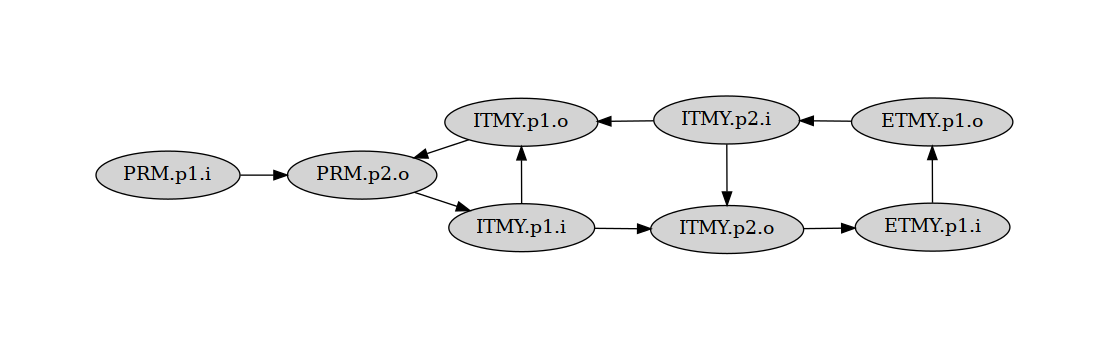

In [10]:
grf.drawing.graphviz_draw(network=G3, angle=10, scale=1.4, ratio=2, format='png')

In [11]:
out1 = grf.drawing.graphviz_draw(network=G3, angle=10, scale=1.4, ratio=2, format='pdf', ipython_display=False, pad=[0,0])
with open('PRC-ARM_step1.pdf', 'wb') as f:
    f.write(out1)

In [14]:
nodes = ['ITMY.p1.i','ITMY.p2.i','ETMY.p1.i','ETMY.p1.o']
G4 = grf.copy_graph(G3)
for node in nodes:
    grf.absorb_node(G4, node, inplace=True)

In [15]:
grf.drawing.graphviz_draw(network=G4, angle=10, scale=1.3, ratio=2, format='png')

In [14]:
out1 = grf.drawing.graphviz_draw(network=G4, angle=10, scale=1.3, ratio=2,format='pdf', ipython_display=False, pad=[0,0])
with open('PRC-ARM_step1.pdf', 'wb') as f:
    f.write(out1)

In [15]:
GN = grf.copy_graph(G1)
mapping = {n:n+'\n'+(len(n)//2-1)*' '+str(i) for i,n in enumerate(G1.nodes)}
mapping = {n:f"{(len(n)//2-2)*' '}({i})\n{n}" for i,n in enumerate(G1.nodes)}
GN = nx.relabel_nodes(GN, mapping)

In [16]:
grf.drawing.graphviz_draw(network=GN, scale=[1.45,1.6])

In [17]:
out1 = grf.drawing.graphviz_draw(network=GN, scale=[1.45,1.6], format='pdf', ipython_display=False, pad=[0,0], node_attrs={'style':'filled'})
with open('PRC-ARM_num.pdf', 'wb') as f:
    f.write(out1)